In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from itertools import chain

In [2]:
BASE_DIR = "/Users/artemvopilov/Programming/yandex_cup_2023"

In [3]:
NORMED_EMBEDDINGS_DIR = f"{BASE_DIR}/normed_embeddings"
PCA_EMBEDDINGS_DIR = f"{BASE_DIR}/pca_embeddings"
TSNE_EMBEDDINGS_DIR = f"{BASE_DIR}/tsne_embeddings"

### Read embeddings

In [5]:
track_id_to_embeddings = {}
for fn in tqdm(os.listdir(NORMED_EMBEDDINGS_DIR)):
    fp = f"{NORMED_EMBEDDINGS_DIR}/{fn}"

    track_id = fn.split('.')[0]
    embeddings = np.load(fp)
    track_id_to_embeddings[track_id] = embeddings

  0%|          | 0/76714 [00:00<?, ?it/s]

### PCA

In [6]:
%%time

track_ids = list(track_id_to_embeddings.keys())
embeddings = [track_id_to_embeddings[ti] for ti in track_ids]
embeddings = list(chain.from_iterable(embeddings))
len(embeddings)

CPU times: user 597 ms, sys: 170 ms, total: 766 ms
Wall time: 788 ms


4452609

In [7]:
%%time

pca = PCA(n_components=32)
pca.fit(embeddings[:1500000])

CPU times: user 3min 22s, sys: 1min 39s, total: 5min 2s
Wall time: 3min 58s


PCA(n_components=32)

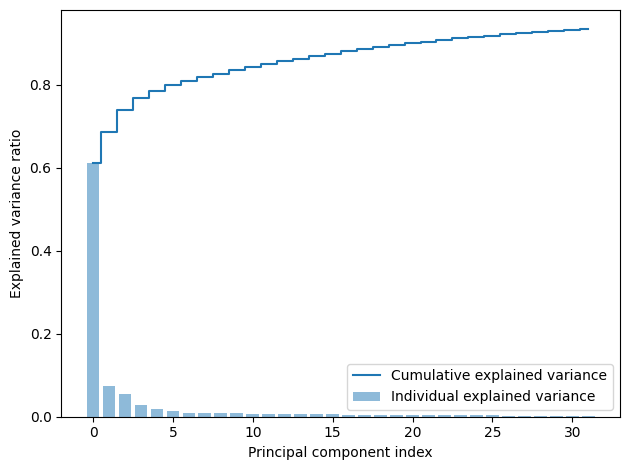

In [8]:
explained_var_ratio = pca.explained_variance_ratio_
explained_var_ratio_cum_sum = np.cumsum(explained_var_ratio)

plt.bar(range(0, len(explained_var_ratio)), explained_var_ratio, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0, len(explained_var_ratio_cum_sum)), explained_var_ratio_cum_sum, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [17]:
track_id_to_pca_embeddings = {ti: pca.transform(embeddings) for ti, embeddings in tqdm(track_id_to_embeddings.items())}

  0%|          | 0/76714 [00:00<?, ?it/s]

### Save

In [18]:
os.mkdir(PCA_EMBEDDINGS_DIR)

In [22]:
for ti, embeddings in tqdm(track_id_to_pca_embeddings.items()):
    fn = f"{ti}.npy"
    fp = f"{PCA_EMBEDDINGS_DIR}/{fn}"
    np.save(fp, embeddings)

  0%|          | 0/76714 [00:00<?, ?it/s]